In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Attribute Information:**

The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label. 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



In [3]:
# reading the dataset

data = pd.read_csv('drive/My Drive/Projects/practice/Online Shoppers Purchasing Intention/online_shoppers_intention.csv')

# checking the shape of the data
data.shape

(12330, 18)

In [4]:
# checking the head of the data

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# describing the data

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# checking the datatypes of the data

data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
# taking out the information from the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [8]:
# checking if the data contains any NULL values

data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# checing the distribution of revenue

data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


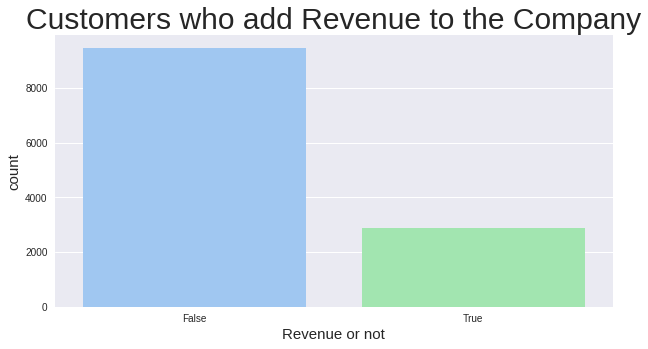

In [10]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Customers who add Revenue to the Company', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [11]:

#  checking the distribution of Weekend

data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


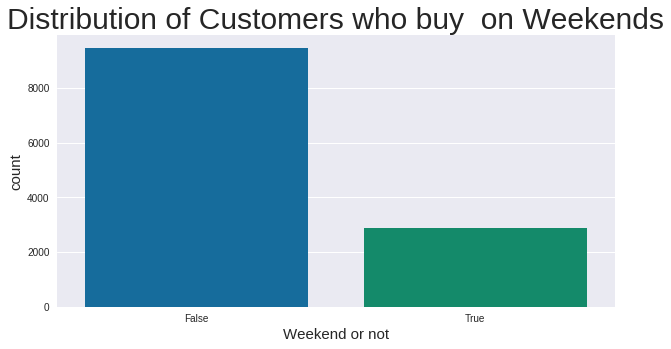

In [12]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Weekend'], palette = 'colorblind')
plt.title('Distribution of Customers who buy  on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [13]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

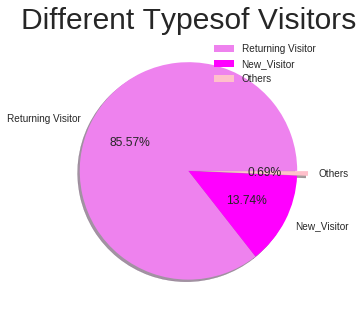

In [14]:
# plotting a pie chart for browsers

size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Typesof Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

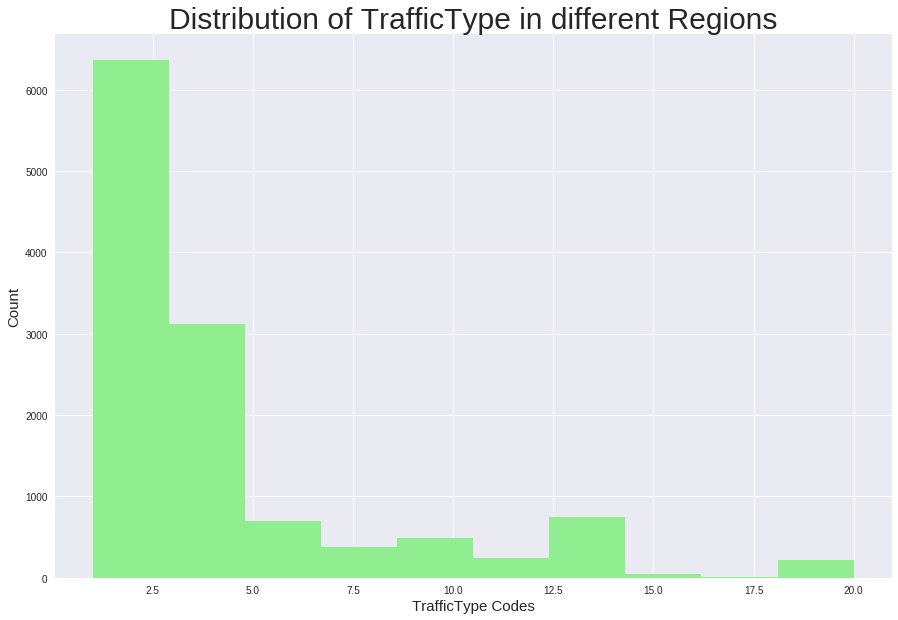

In [15]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(data['TrafficType'], color = 'lightgreen')
plt.title('Distribution of TrafficType in different Regions',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

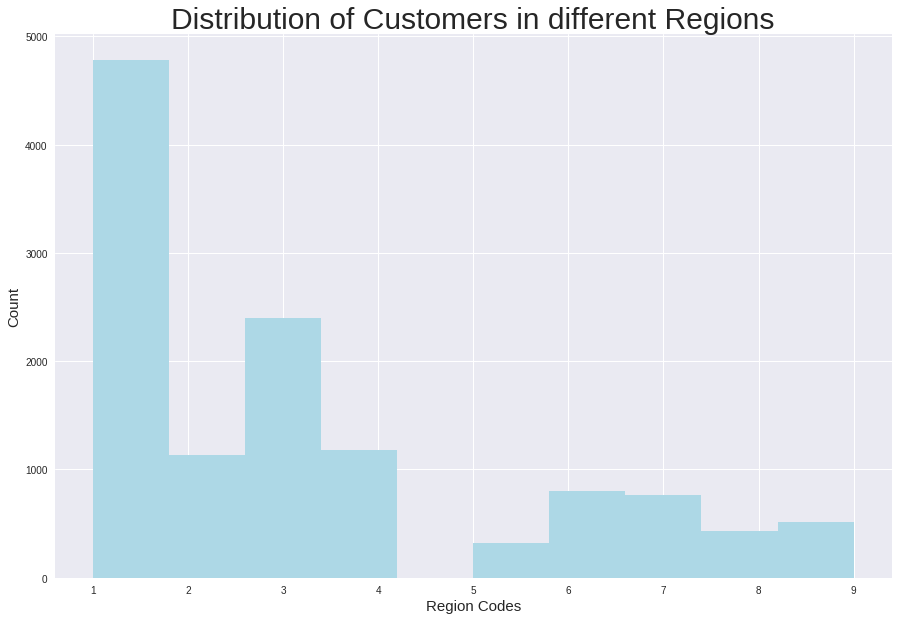

In [16]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers in different Regions',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [17]:
# checking different no. of browsers they use for shopping

data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

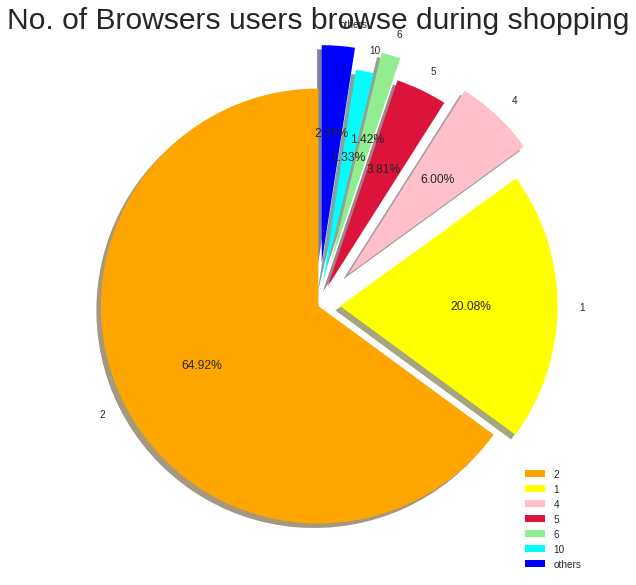

In [18]:
# plotting a pie chart for browsers

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
explode = [0, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('No. of Browsers users browse during shopping', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [19]:
# checking the no. of OSes each user is having

data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

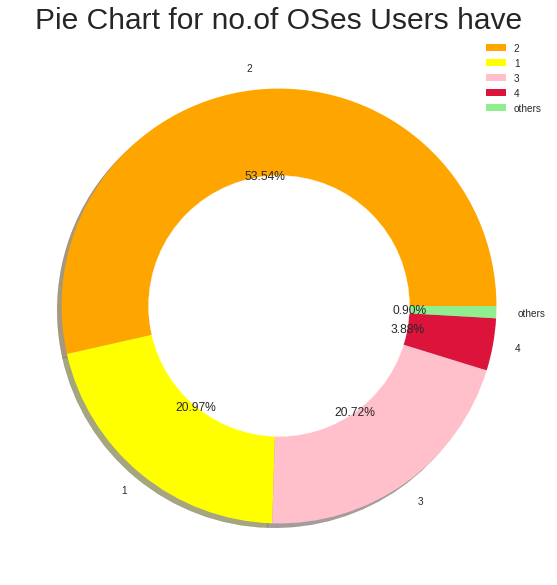

In [20]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for no.of OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [21]:
#checking the months with most no.of customers visiting the online shopping sites

data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

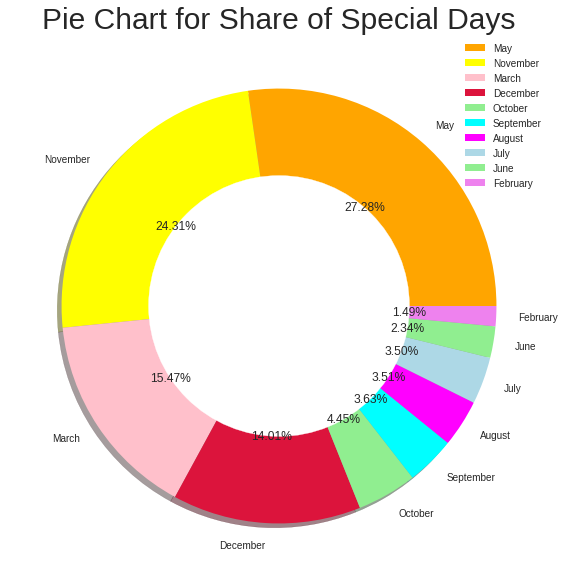

In [22]:
# creating a donut chart for the months variations'

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for Share of Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [23]:
# looking at the probabilities of special day

data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

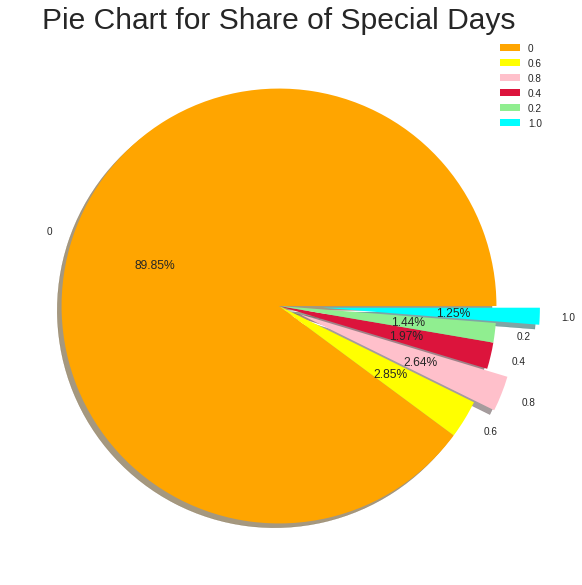

In [24]:
# plotting a pie chart for share of special days

size = [11079, 351, 325, 243, 178, 154]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan']
labels = "0", "0.6", "0.8", "0.4", "0.2", "1.0"
explode = [0, 0, 0.1, 0, 0, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for Share of Special Days', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


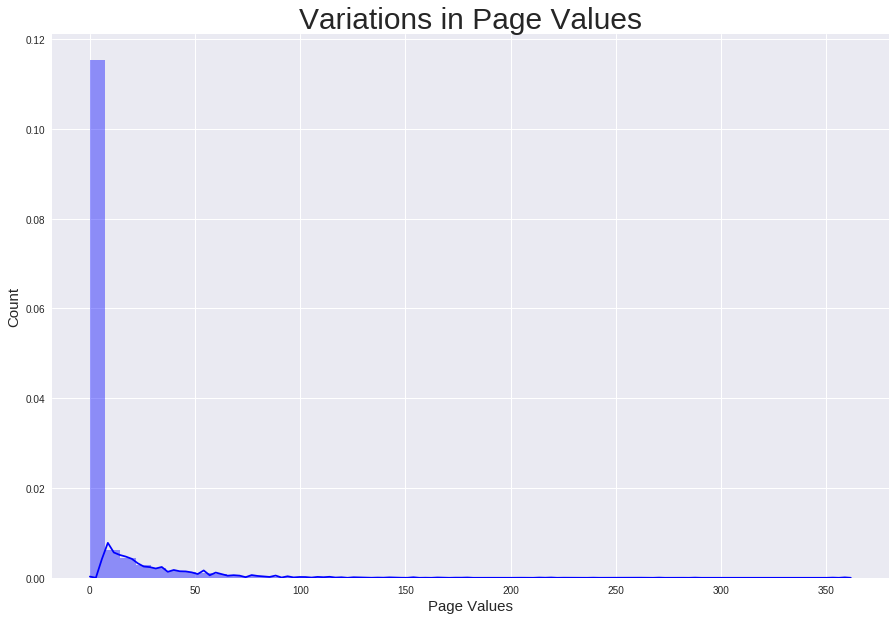

In [25]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['PageValues'], color = 'blue')
plt.title('Variations in Page Values', fontsize = 30)
plt.xlabel('Page Values', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


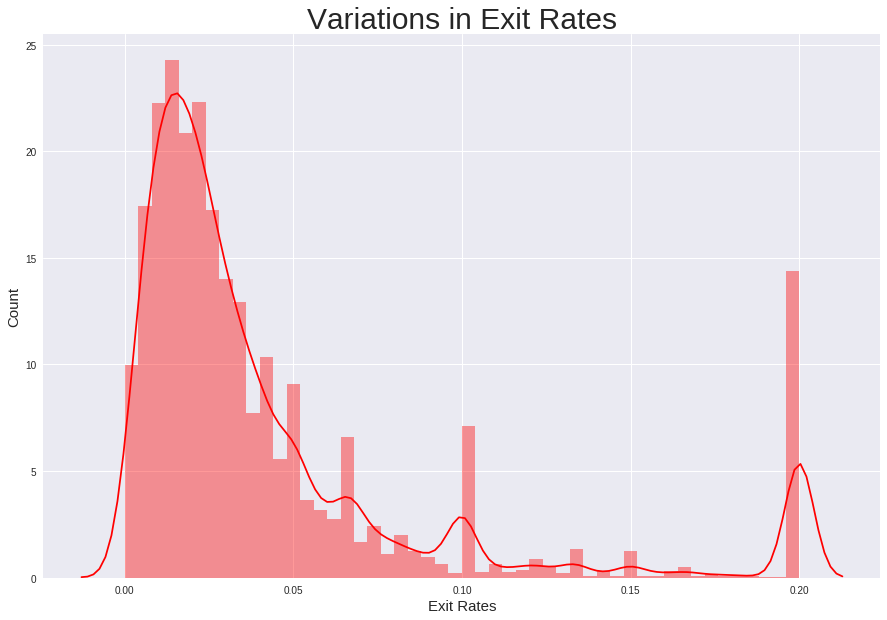

In [26]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ExitRates'], color = 'red')
plt.title('Variations in Exit Rates', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


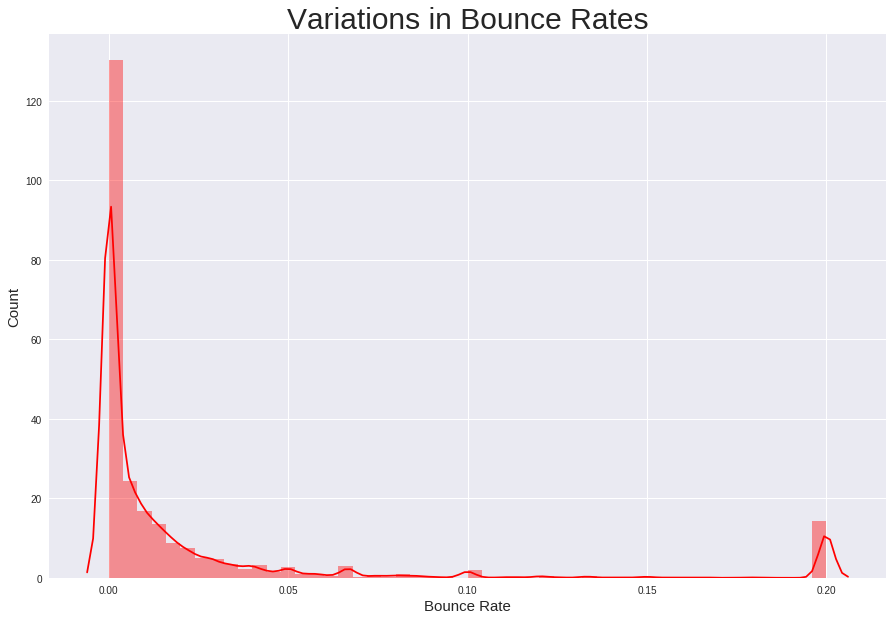

In [27]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['BounceRates'], color = 'red')
plt.title('Variations in Bounce Rates', fontsize = 30)
plt.xlabel('Bounce Rate', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


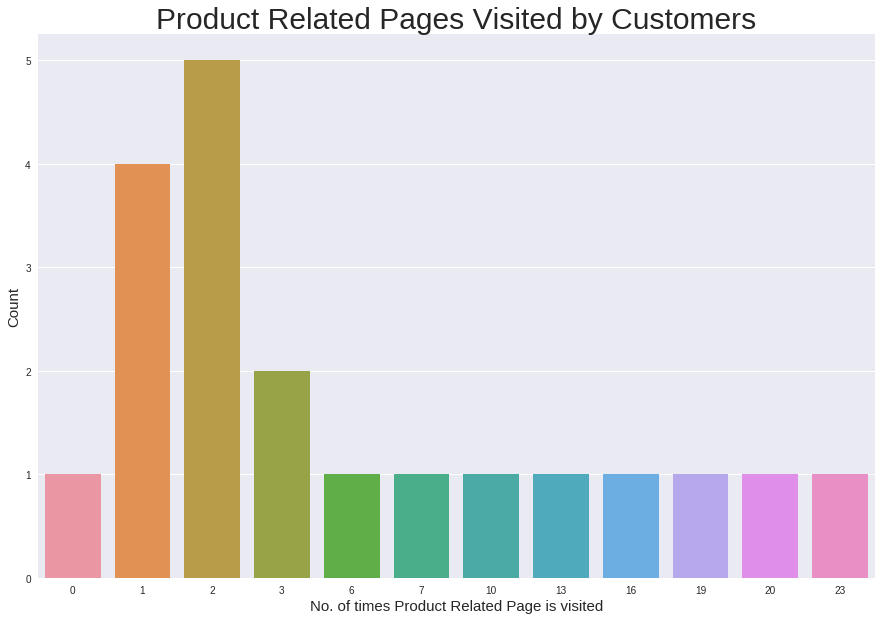

In [28]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data['ProductRelated'].head(20))
plt.title('Product Related Pages Visited by Customers', fontsize = 30)
plt.xlabel('No. of times Product Related Page is visited', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


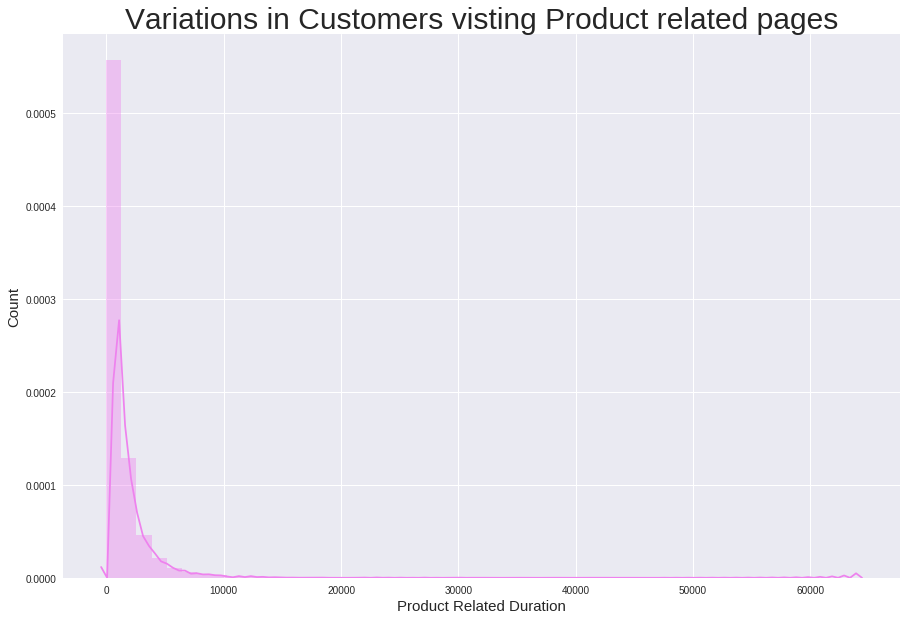

In [29]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ProductRelated_Duration'], color = 'violet')
plt.title('Variations in Customers visting Product related pages', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


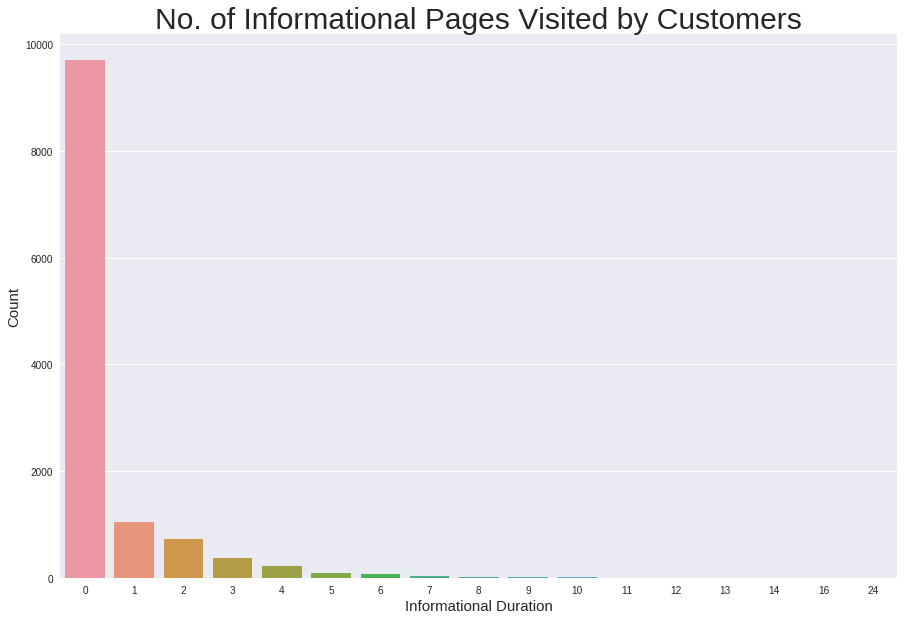

In [30]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data['Informational'])
plt.title('No. of Informational Pages Visited by Customers', fontsize = 30)
plt.xlabel('Informational Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


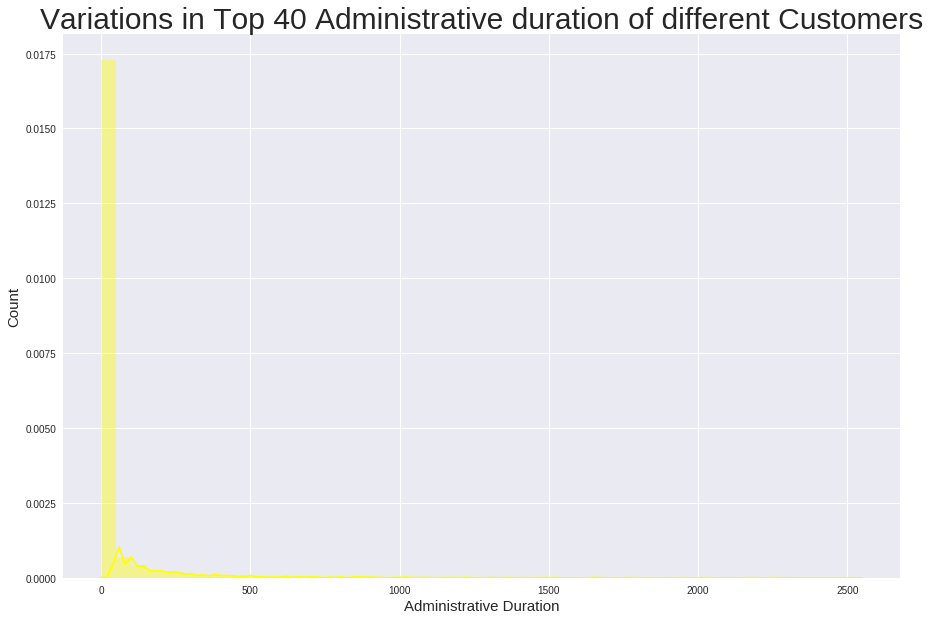

In [31]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['Informational_Duration'], color = 'yellow')
plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

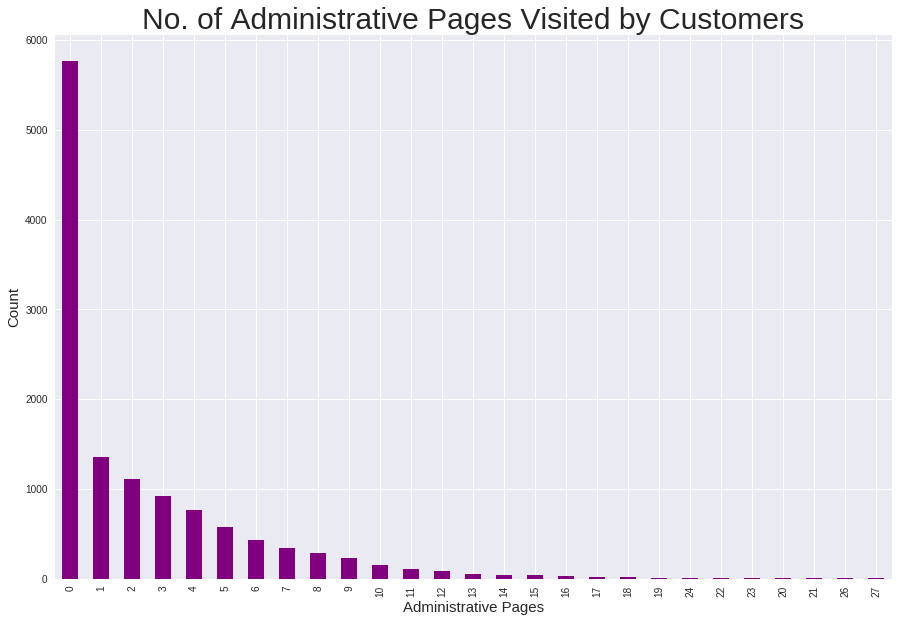

In [32]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
data['Administrative'].value_counts().plot.bar(color = 'purple')
plt.title('No. of Administrative Pages Visited by Customers', fontsize = 30)
plt.xlabel('Administrative Pages', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


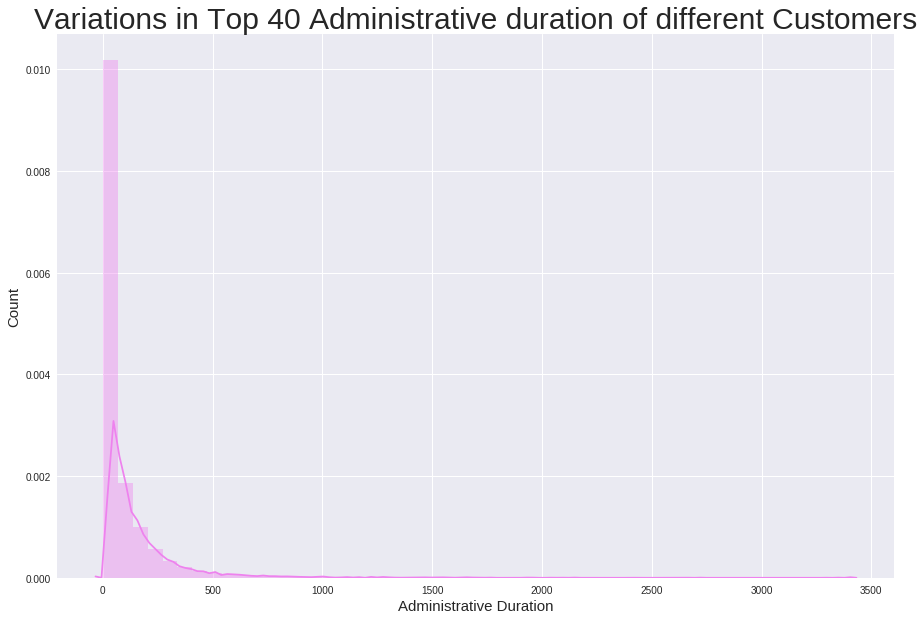

In [33]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['Administrative_Duration'], color = 'violet')
plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

**Bi-Variate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


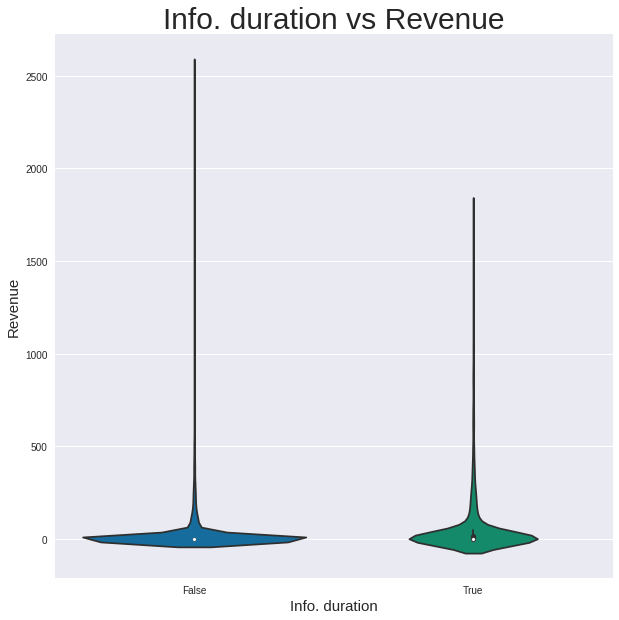

In [34]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['Informational_Duration'], palette = 'colorblind')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


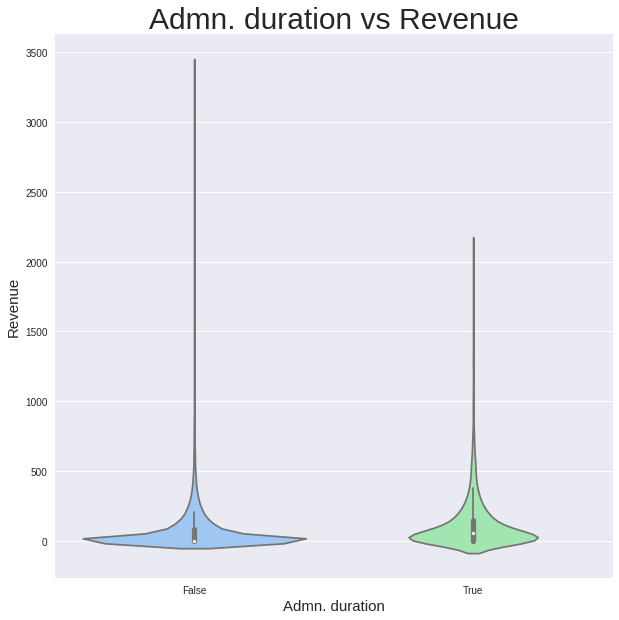

In [35]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


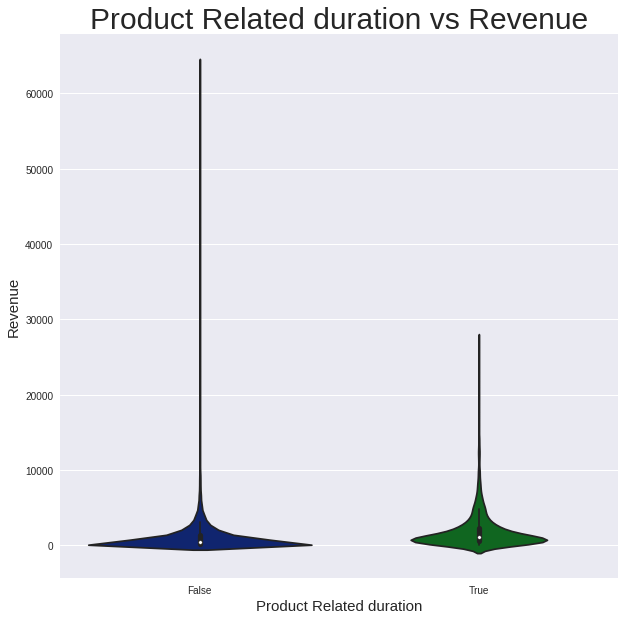

In [36]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


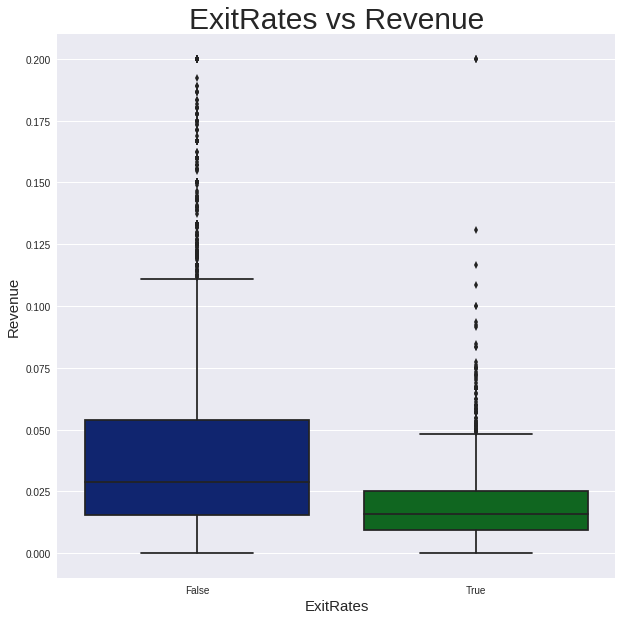

In [37]:
# exit rate vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['ExitRates'], palette = 'dark')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


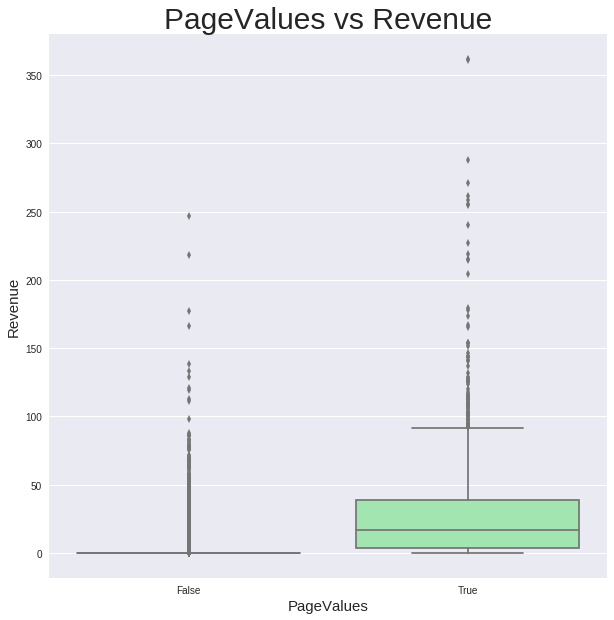

In [38]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['PageValues'], palette = 'pastel')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


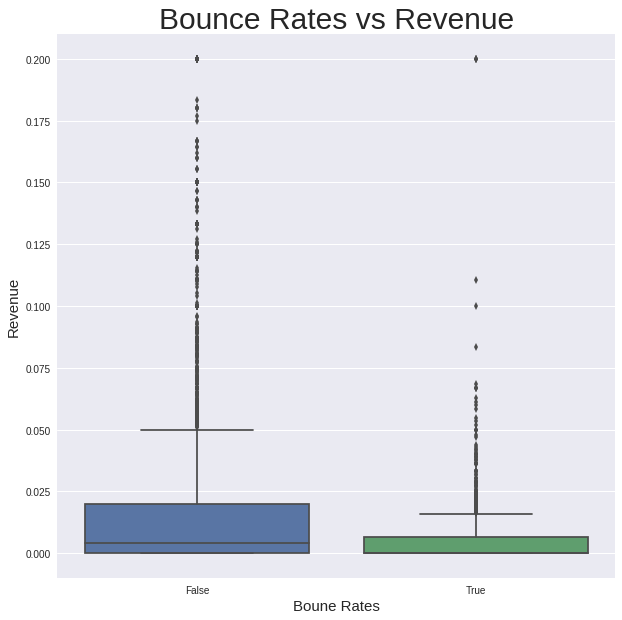

In [39]:

# bounce rates vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['BounceRates'])
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

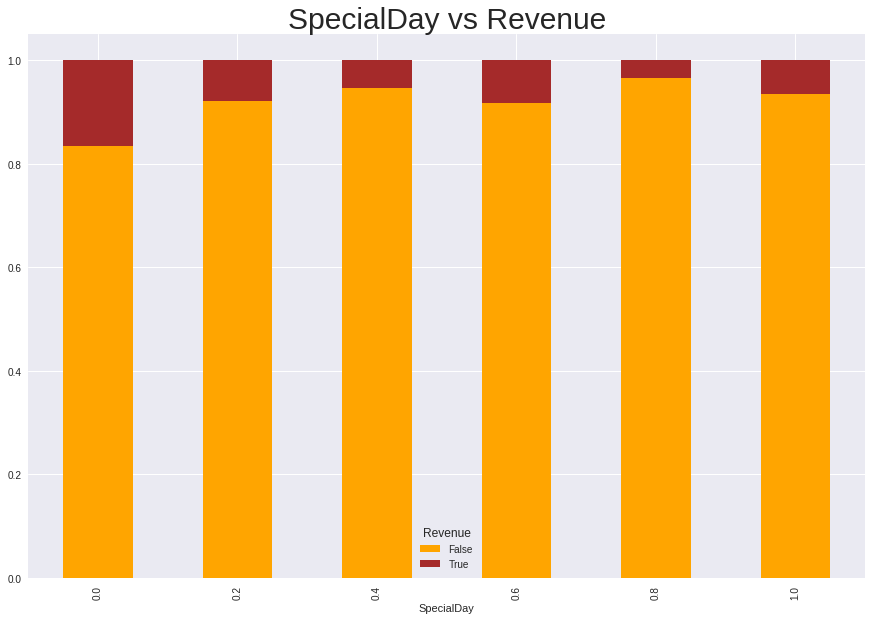

In [40]:
# specialday vs revenue

df = pd.crosstab(data['SpecialDay'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['orange', 'brown'])
plt.title('SpecialDay vs Revenue', fontsize = 30)
plt.show()

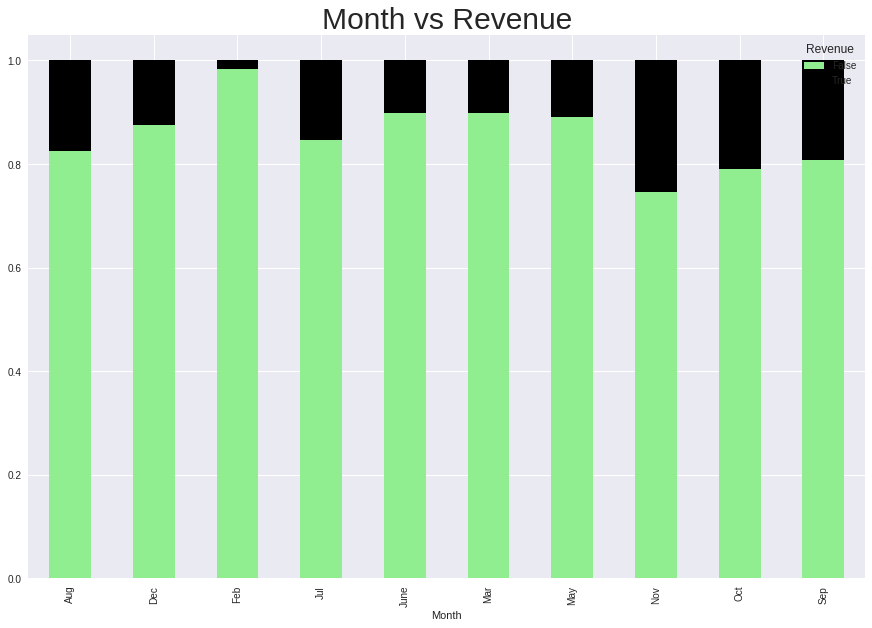

In [41]:
# months vs revenue

df = pd.crosstab(data['Month'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightgreen', 'black'])
plt.title('Month vs Revenue', fontsize = 30)
plt.show()

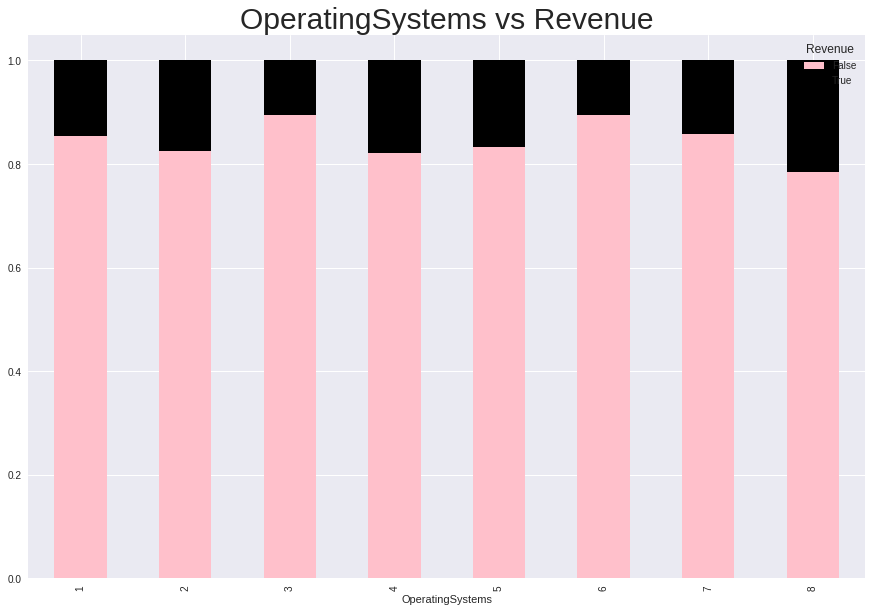

In [42]:
# operating system vs Revenue

df = pd.crosstab(data['OperatingSystems'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['pink', 'black'])
plt.title('OperatingSystems vs Revenue', fontsize = 30)
plt.show()

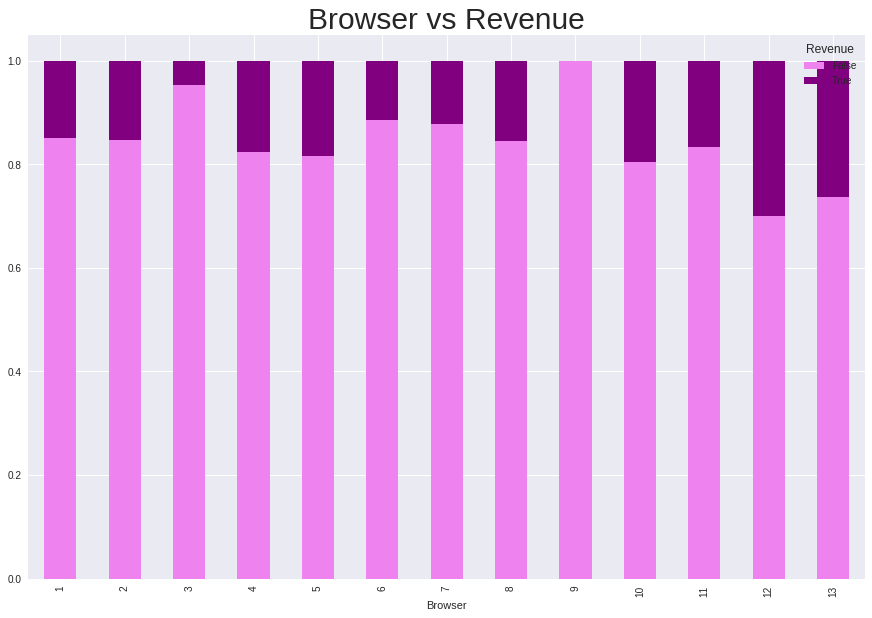

In [43]:
# browser vs Revenue

df = pd.crosstab(data['Browser'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['violet', 'Purple'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

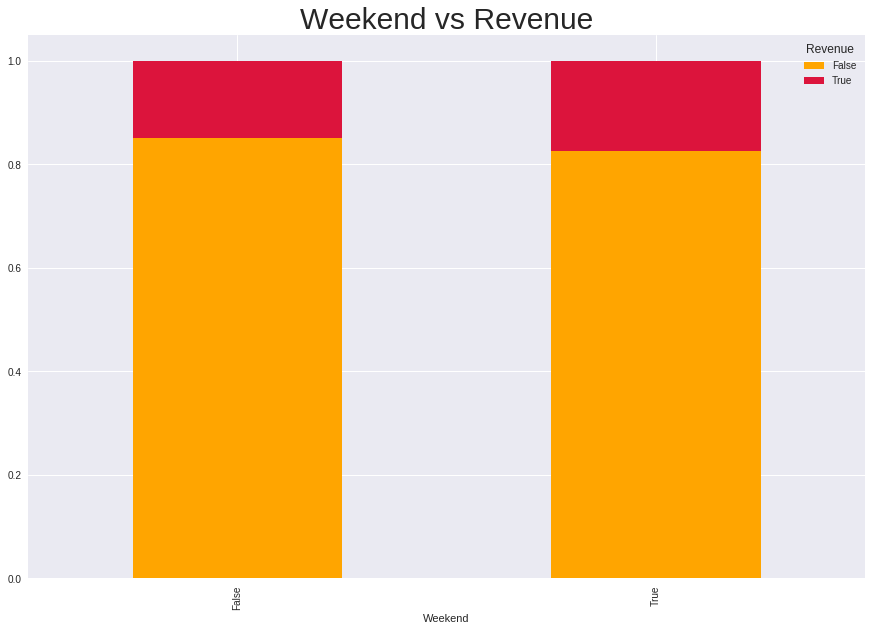

In [44]:
# weekend vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

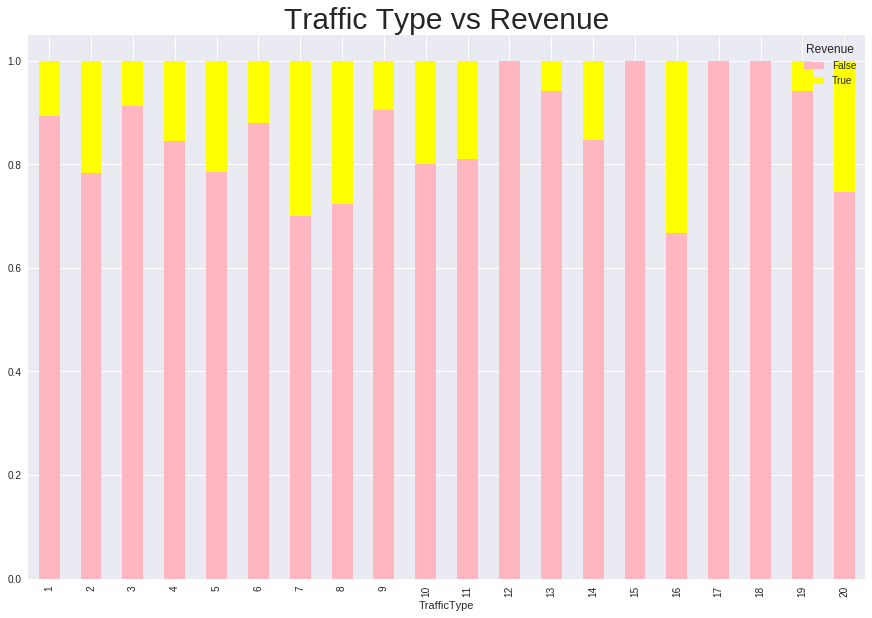

In [45]:
# Traffic Type vs Revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

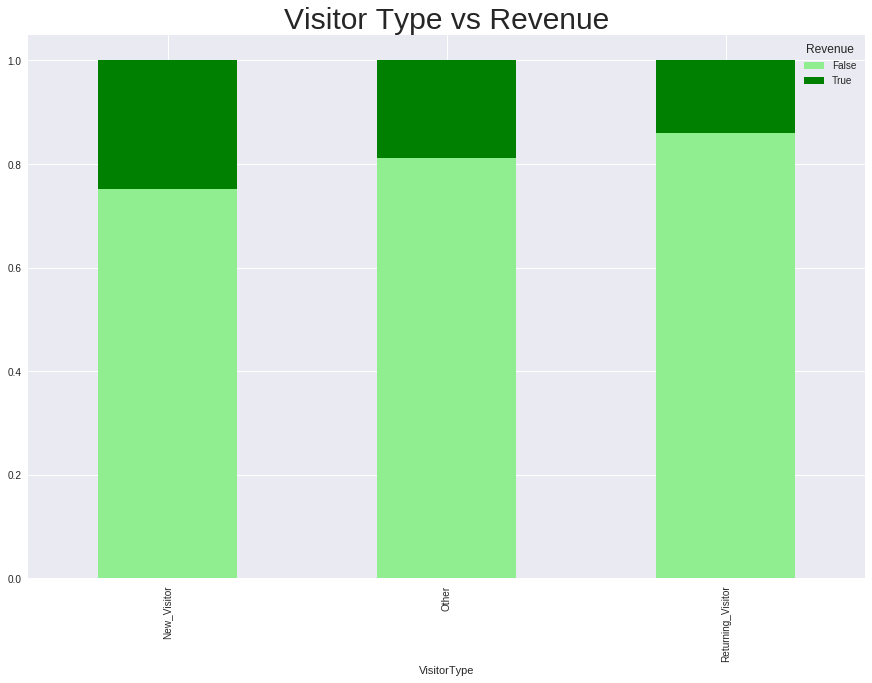

In [46]:
# visitor type vs revenue

df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()


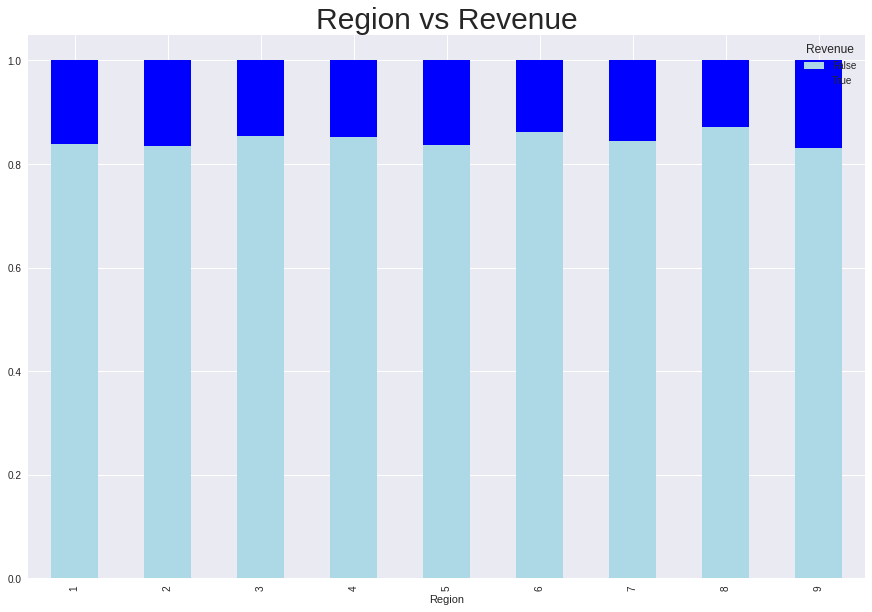

In [47]:
# region vs Revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

Text(0.5, 1.0, 'LM Plot between Admistrative and Information')

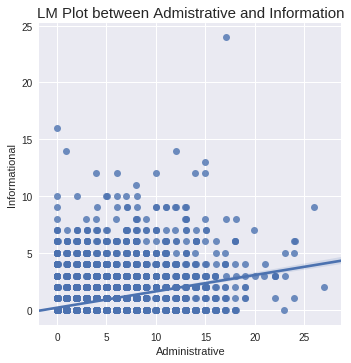

In [48]:
# lm plot

plt.rcParams['figure.figsize'] = (20, 10)

sns.lmplot(x = 'Administrative', y = 'Informational', data = data, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)


**Multi-Variate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


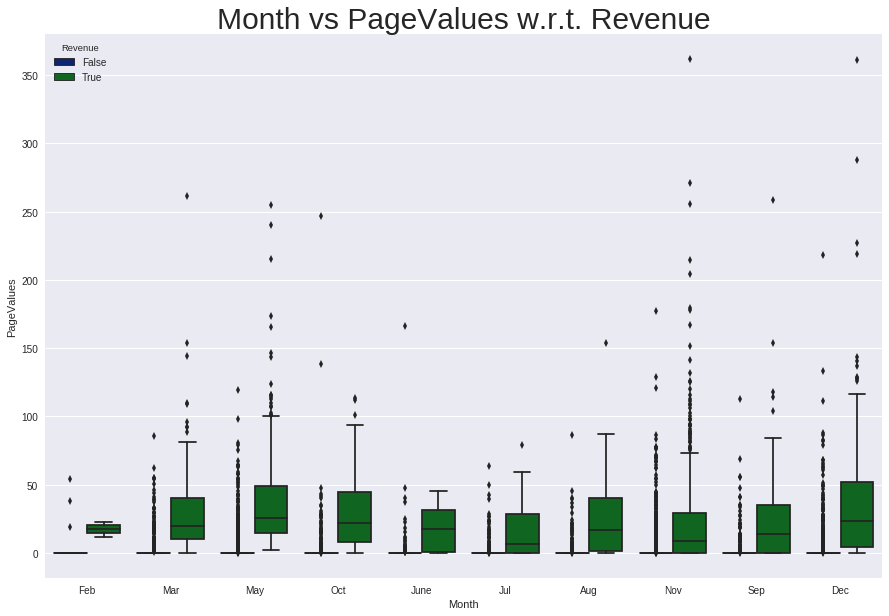

In [49]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'dark')
plt.title('Month vs PageValues w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


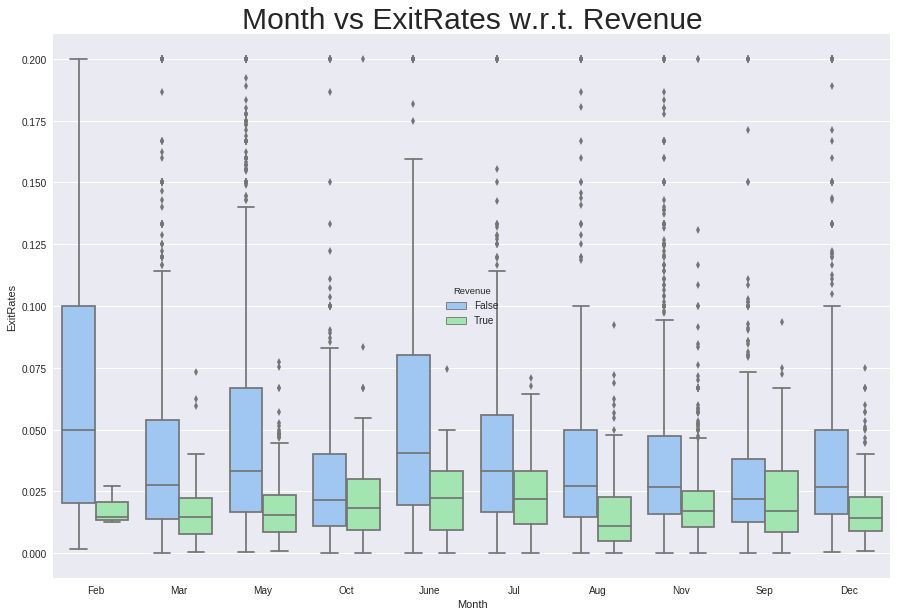

In [50]:
# month vs exitrates wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Month vs ExitRates w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


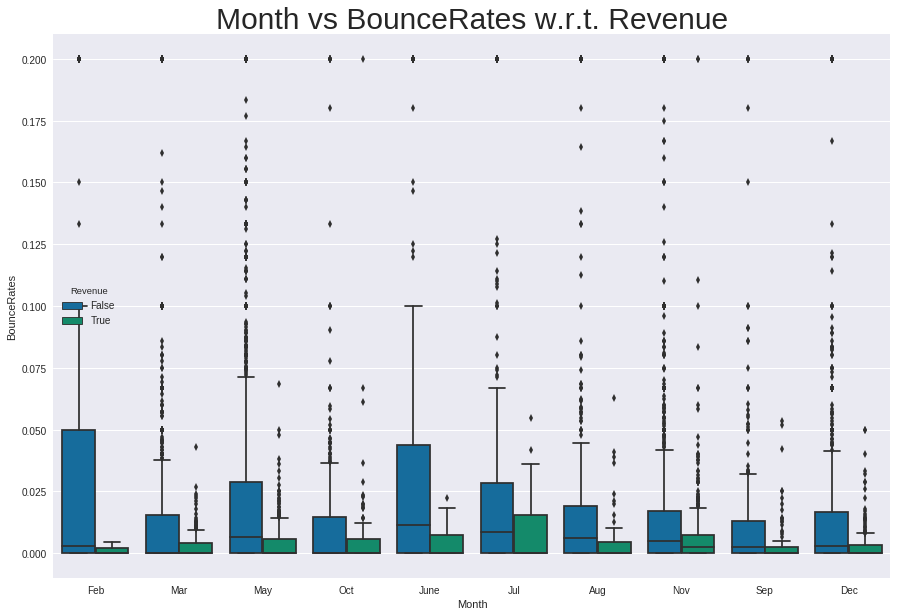

In [51]:
# month vs bouncerates wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Month vs BounceRates w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


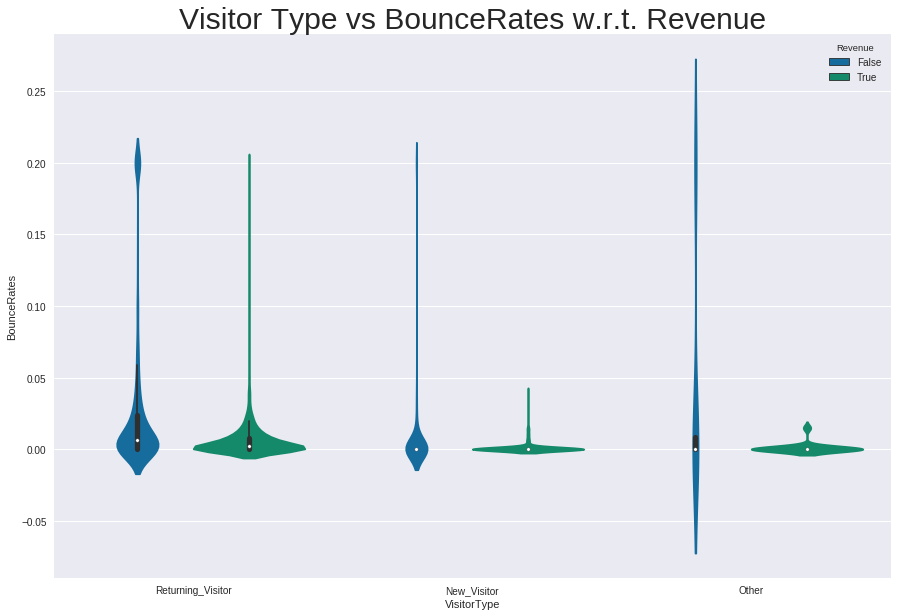

In [52]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Visitor Type vs BounceRates w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


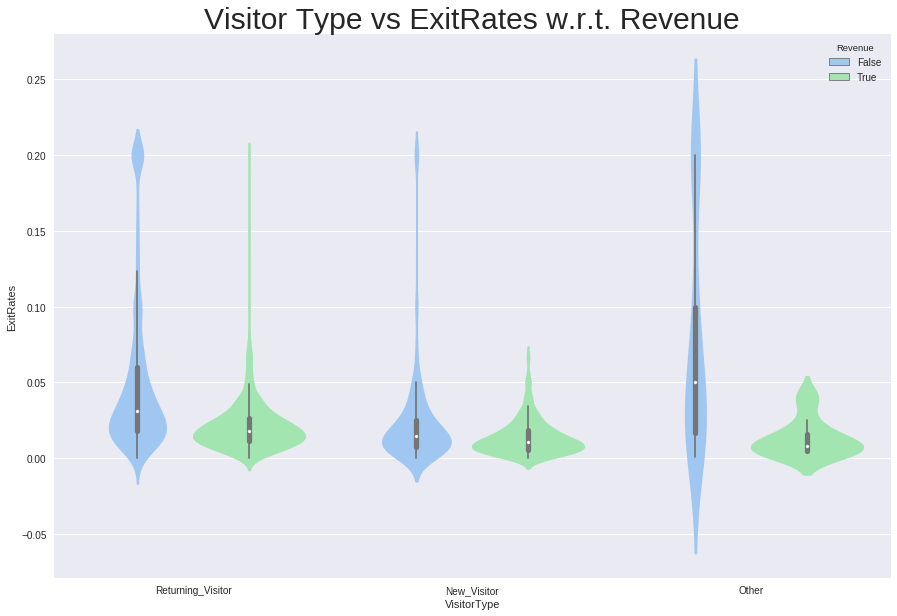

In [53]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Visitor Type vs ExitRates w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


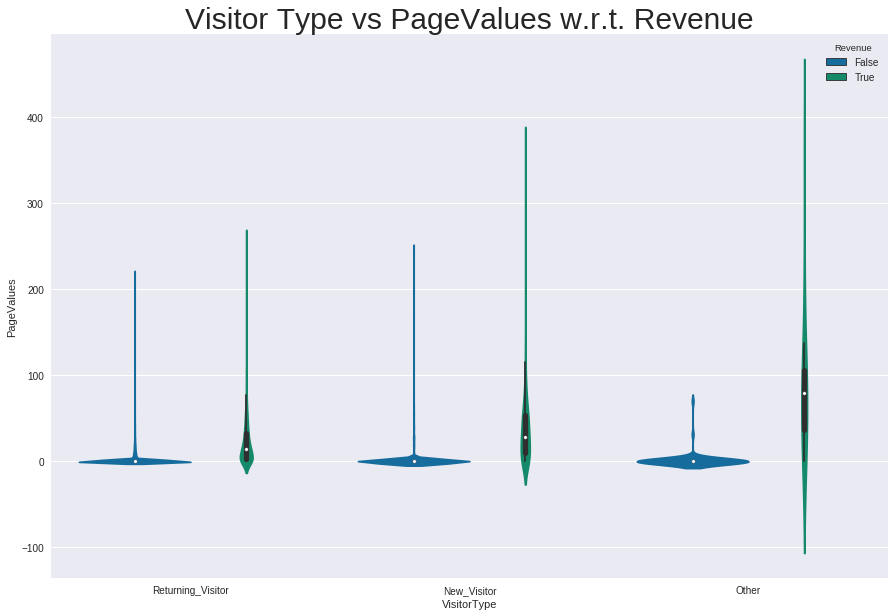

In [54]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Visitor Type vs PageValues w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


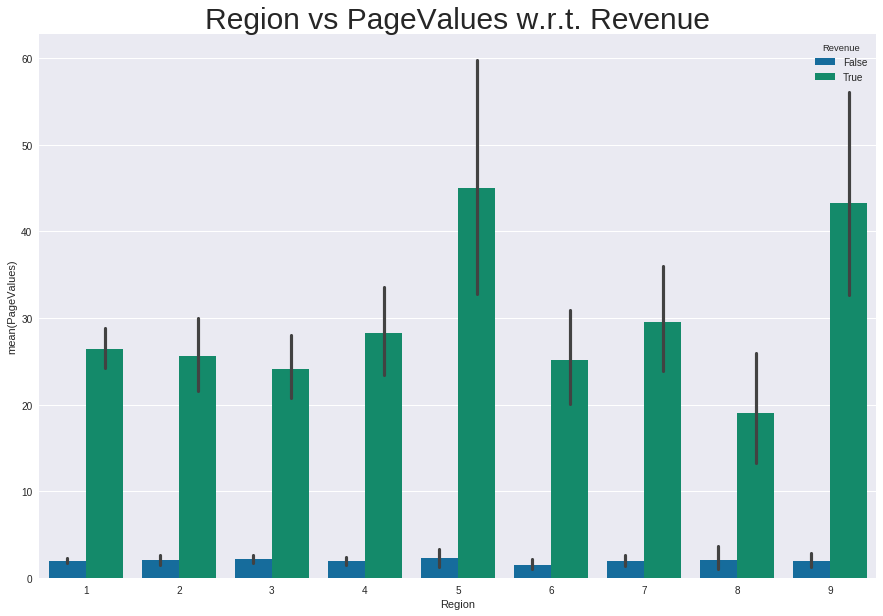

In [55]:
# region vs pagevalues w.r.t. revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Region vs PageValues w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


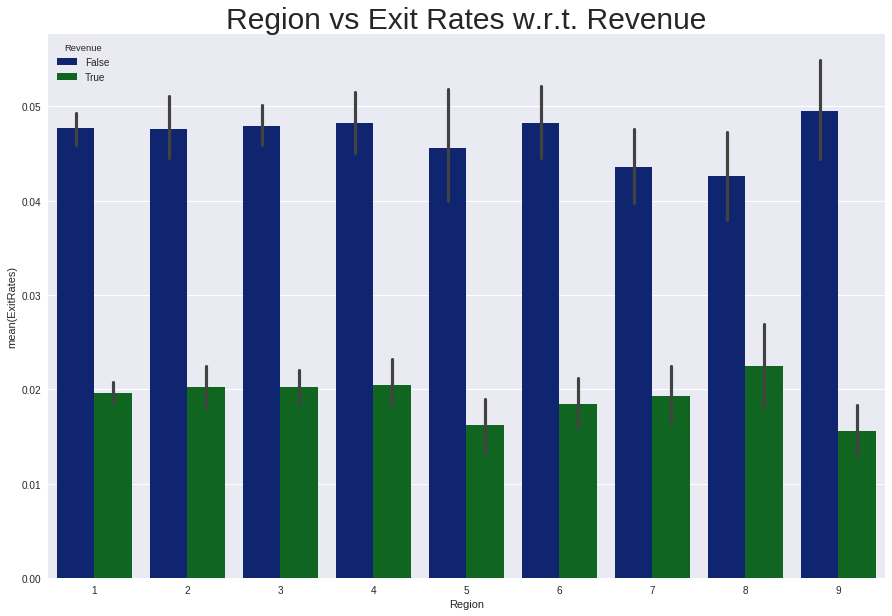

In [56]:
# region vs exit rates w.r.t. revenue


plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'dark')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


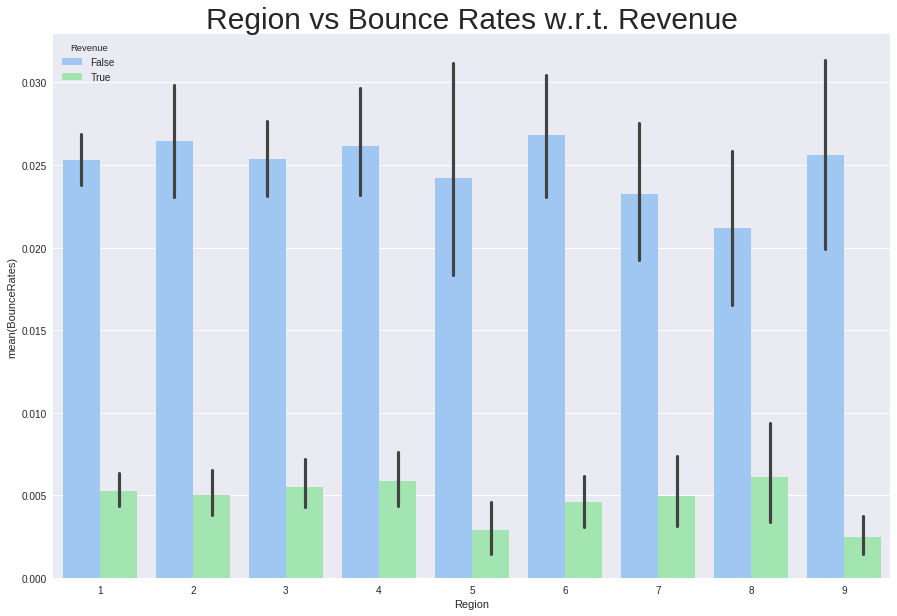

In [57]:
# region vs Bounce rates wrt revenue


plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['BounceRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Region vs Bounce Rates w.r.t. Revenue', fontsize = 30)
plt.show()

In [58]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [59]:
# one hot encoding 

data1 = pd.get_dummies(data)

data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [60]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [61]:
# getting dependent and independent variables

x = data1
y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (12330, 29)
Shape of y: (12330,)


In [62]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 29)
Shape of y_train : (8631,)
Shape of x_test : (3699, 29)
Shape of y_test : (3699,)


In [63]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
# feature extraction

from sklearn.decomposition import PCA

pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [65]:
# MODELLING

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 1.0
[[3077    0]
 [   0  622]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      1.00      1.00       622

   micro avg       1.00      1.00      1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 1.0
Testing Accuracy : 0.9962151932954852
[[3071    6]
 [   8  614]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       0.99      0.99      0.99       622

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       1.00      1.00      1.00      3699



In [67]:
# MODELLING

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9991889699918897
[[3075    2]
 [   1  621]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      1.00      1.00       622

   micro avg       1.00      1.00      1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699



In [68]:
# MODELLING

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9945931332792647
[[3069    8]
 [  12  610]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       0.99      0.98      0.98       622

   micro avg       0.99      0.99      0.99      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       0.99      0.99      0.99      3699



In [69]:
# MODELLING

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9978372533117059
[[3077    0]
 [   8  614]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      0.99      0.99       622

   micro avg       1.00      1.00      1.00      3699
   macro avg       1.00      0.99      1.00      3699
weighted avg       1.00      1.00      1.00      3699



In [0]:
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())

In [73]:
#hyper parameter tuning

from sklearn.model_selection import GridSearchCV

params = {'C':[0.1, 1, 10], 'kernel':['rbf', 'linear', 'poly'], 'gamma': [0.1, 0.001, 0.0001]}

grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 5)
grid_search = grid_search.fit(x_train, y_train)

# getting results
print("Best Accuracy :", grid_search.best_score_)
print("Best Parameters :", grid_search.best_params_)

Best Accuracy : 1.0
Best Parameters : {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [74]:
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Mean Accuracy : 0.9980303935129797
Mean Standard Deviation : 0.0012738221447376459
